<a href="https://colab.research.google.com/github/ManasMittal19/Algos/blob/Supervised-Learning/LinearRegressionScikitLearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive

In [43]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
file_path = '/content/drive/MyDrive/IDBMS/50_Startups.csv'
df = pd.read_csv(file_path)

In [45]:
from sklearn.linear_model import SGDRegressor # this is used for regression
from sklearn.preprocessing import StandardScaler # this is used for feature scaling

In [46]:
x_train = df.iloc[:,0:3]
print(x_train)
x_feature = ['R&D Spend', 'Administration', 'Marketing Spend']
y_train = df.iloc[: ,4]
print(y_train)

    R&D Spend  Administration  Marketing Spend
0   165349.20       136897.80        471784.10
1   162597.70       151377.59        443898.53
2   153441.51       101145.55        407934.54
3   144372.41       118671.85        383199.62
4   142107.34        91391.77        366168.42
5   131876.90        99814.71        362861.36
6   134615.46       147198.87        127716.82
7   130298.13       145530.06        323876.68
8   120542.52       148718.95        311613.29
9   123334.88       108679.17        304981.62
10  101913.08       110594.11        229160.95
11  100671.96        91790.61        249744.55
12   93863.75       127320.38        249839.44
13   91992.39       135495.07        252664.93
14  119943.24       156547.42        256512.92
15  114523.61       122616.84        261776.23
16   78013.11       121597.55        264346.06
17   94657.16       145077.58        282574.31
18   91749.16       114175.79        294919.57
19   86419.70       153514.11             0.00
20   76253.86

In [47]:
#doing feature scaling
scaler = StandardScaler()

In [48]:
x_norm = scaler.fit_transform(x_train)

In [49]:
print(x_norm)

[[ 2.01641149e+00  5.60752915e-01  2.15394309e+00]
 [ 1.95586034e+00  1.08280658e+00  1.92360040e+00]
 [ 1.75436374e+00 -7.28257028e-01  1.62652767e+00]
 [ 1.55478369e+00 -9.63646307e-02  1.42221024e+00]
 [ 1.50493720e+00 -1.07991935e+00  1.28152771e+00]
 [ 1.27980001e+00 -7.76239071e-01  1.25421046e+00]
 [ 1.34006641e+00  9.32147208e-01 -6.88149930e-01]
 [ 1.24505666e+00  8.71980011e-01  9.32185978e-01]
 [ 1.03036886e+00  9.86952101e-01  8.30886909e-01]
 [ 1.09181921e+00 -4.56640246e-01  7.76107440e-01]
 [ 6.20398248e-01 -3.87599089e-01  1.49807267e-01]
 [ 5.93085418e-01 -1.06553960e+00  3.19833623e-01]
 [ 4.43259872e-01  2.15449064e-01  3.20617441e-01]
 [ 4.02077603e-01  5.10178953e-01  3.43956788e-01]
 [ 1.01718075e+00  1.26919939e+00  3.75742273e-01]
 [ 8.97913123e-01  4.58678535e-02  4.19218702e-01]
 [ 9.44411957e-02  9.11841968e-03  4.40446224e-01]
 [ 4.60720127e-01  8.55666318e-01  5.91016724e-01]
 [ 3.96724938e-01 -2.58465367e-01  6.92992062e-01]
 [ 2.79441650e-01  1.15983657e+

In [50]:
# doing linear regression
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(x_norm, y_train)
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations completed: 348, number of weight updates: 17401.0


In [51]:
print(sgdr.__dict__)  # all the parameters that we have choosed

{'loss': 'squared_error', 'penalty': 'l2', 'learning_rate': 'invscaling', 'epsilon': 0.1, 'alpha': 0.0001, 'C': 1.0, 'l1_ratio': 0.15, 'fit_intercept': True, 'shuffle': True, 'random_state': None, 'verbose': 0, 'eta0': 0.01, 'power_t': 0.25, 'early_stopping': False, 'validation_fraction': 0.1, 'n_iter_no_change': 5, 'warm_start': False, 'average': False, 'max_iter': 1000, 'tol': 0.001, 'coef_': array([36432.06211518,  -678.52302595,  3475.09386664]), 'intercept_': array([112013.13600271]), 't_': 17401.0, 'n_features_in_': 3, 'n_iter_': 348}


In [52]:
# fetching the result
b_norm = sgdr.intercept_

w_norm = sgdr.coef_
print(f"model parameters w: {w_norm}, b:{b_norm}")

model parameters w: [36432.06211518  -678.52302595  3475.09386664], b:[112013.13600271]


In [53]:
y_pred_sgd = sgdr.predict(x_norm) # prediction using inbuilt function
# make a prediction using w,b.
y_pred = np.dot(x_norm, w_norm) + b_norm # prediction using the caculated value
print(y_pred , y_pred_sgd)

print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")

print(f"Prediction on training set:\n{y_pred[:4]}" )
print(f"Target values \n{y_train[:4]}")

[192579.83542303 189219.14400573 182074.70010006 173664.81168207
 172027.2809149  163524.08478215 157810.64959533 160020.89270969
 151769.33861508 154797.24830044 135399.11273007 135454.90580299
 129129.99573356 127510.76616088 149515.68678833 146151.66461547
 116978.22842655 130271.36958755 129050.23074548 115349.26585043
 116741.98446702 117508.75522933 114846.11463046 110123.47119749
 113194.3021434  102209.07992558 110534.60287473 114640.30889445
 101697.98272266 101748.7803145   99308.89423689  97630.66683979
  98817.63804128  97950.16635697  89233.29089521  90528.5495342
  75464.33333278  89552.23391502  69741.87697313  83725.6146218
  74931.88224511  74830.00754309  70667.41603249  60153.58134614
  64625.29372207  47637.49207672  56568.26832359  46505.11124075
  48986.89019973  48252.99768949] [192579.83542303 189219.14400573 182074.70010006 173664.81168207
 172027.2809149  163524.08478215 157810.64959533 160020.89270969
 151769.33861508 154797.24830044 135399.11273007 135454.90

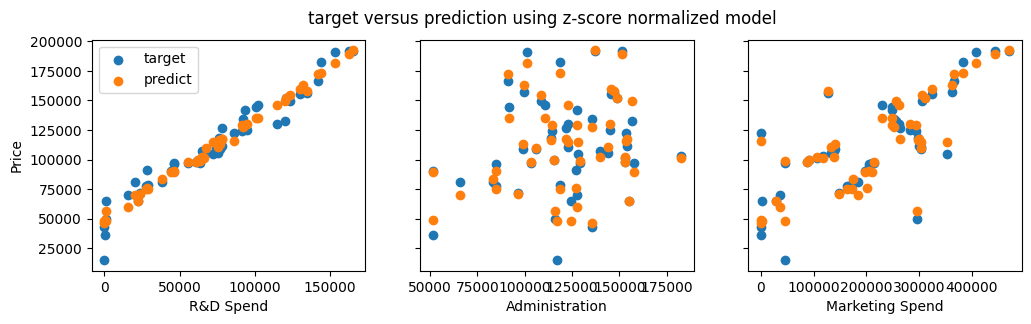

In [79]:
fig,ax= plt.subplots(1,3,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train.iloc[:,i],y_train,label = 'target')
    ax[i].set_xlabel(x_feature[i])
    ax[i].scatter(x_train.iloc[:,i],y_pred, label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()